In [579]:
import pandas as pd
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm
import tkinter as tk 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

## Load Dataset

In [580]:
directory = '/Users/The Pock Family/Desktop/Test/'
df = pd.read_csv(directory+'atl_to_dtw_norm.csv', header=0)

df = pd.DataFrame(df,columns=['DaystoDepart','RoundTrip','SeatClass','Time','Price'])

print (df)

      DaystoDepart  RoundTrip  SeatClass  Time     Price
0                0          0          0     0  0.310573
1                0          0          0     1  0.310573
2                0          0          0     2  0.310573
3                0          1          0     0  0.592511
4                0          1          0     1  0.592511
5                0          1          0     2  0.592511
6                0          0          1     0  0.458150
7                0          0          1     1  0.458150
8                0          0          1     2  0.458150
9                0          1          1     0  0.953744
10               0          1          1     1  0.931718
11               0          1          1     2  0.953744
12               0          0          2     0  0.458150
13               0          0          2     1  0.458150
14               0          0          2     2  0.458150
15               0          1          2     0  0.953744
16               0          1  

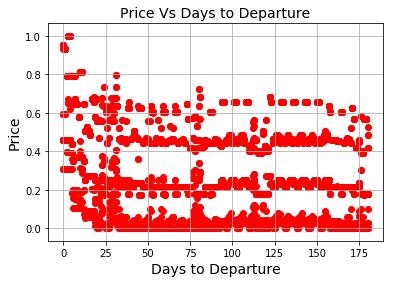

In [581]:
plt.scatter(df['DaystoDepart'], df['Price'], color='red')
plt.title('Price Vs Days to Departure', fontsize=14)
plt.xlabel('Days to Departure', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

In [582]:
df.describe()

,DaystoDepart,RoundTrip,SeatClass,Time,Price
count,3258.000000,3258.000000,3258.000000,3258.000000,3258.000000
mean,90.000000,0.500000,1.000000,1.000000,0.282819
std,52.257422,0.500077,0.816622,0.816622,0.212425
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,0.000000,0.000000,0.000000,0.090308
50%,90.000000,0.500000,1.000000,1.000000,0.237885
75%,135.000000,1.000000,2.000000,2.000000,0.451542
max,180.000000,1.000000,2.000000,2.000000,1.000000


In [583]:
df.corr()

,DaystoDepart,RoundTrip,SeatClass,Time,Price
DaystoDepart,1.000000,0.000000,0.00000,0.000000,-0.172162
RoundTrip,0.000000,1.000000,0.00000,0.000000,0.524902
SeatClass,0.000000,0.000000,1.00000,0.000000,0.602650
Time,0.000000,0.000000,0.00000,1.000000,-0.006329
Price,-0.172162,0.524902,0.60265,-0.006329,1.000000


In [584]:
X = df[['RoundTrip','SeatClass','Time','Price']] 
Y = df['DaystoDepart']


## Split Data into training and test datasets

In [585]:
# Modify Test Size
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,Y,test_size=.3,random_state=0)

In [586]:
# Check size of training and test datasets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2280, 4) (2280,)
(978, 4) (978,)


## Set Variables to make prediction

In [587]:
X_test = [[0,0,0,0]] # [RoundTrip(0-False, 1-True),SeatClass(0-Economy, 1-Business, 2-FirstClass),Time(0-Morning, 1-Afternoon, 2-Evening),Price (0-Cheapest, 1-Most Expensive)]] 

## Linear Regression

In [588]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

model=lm.fit(X_train,y_train)



In [589]:
# Predict using test dataset

predictions_test = lm.predict(X_test)
print ('Days in Advance to Book: \n', predictions_test)


Days in Advance to Book: 
 [89.64685079]


In [590]:
scorelm=lm.score(X_train,y_train)
print ('Accuracy Score: \n', scorelm*100,'%')

Accuracy Score: 
 8.28538496917508 %


## Decision Tree Regression

In [591]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=40)
tree_reg.fit(X_train,y_train)
tree_train = tree_reg.predict(X_train)
tree_test = tree_reg.predict(X_test)

In [592]:
print('Predictions (Training Dataset): \n', tree_train[0:5])

Predictions (Training Dataset): 
 [  5.          25.         100.625       96.82432432   3.5       ]


In [593]:
print('Days in Advance to Book: \n', tree_test)

Days in Advance to Book: 
 [120.]


In [594]:
scoretr=tree_reg.score(X_train,y_train)
print ('Accuracy Score: \n', scoretr*100,'%')

Accuracy Score: 
 51.13100731200425 %


## Polynomial Regression


In [595]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly1 = PolynomialFeatures(degree=2)
X_ = poly1.fit_transform(X_train)
X_test_ = poly1.fit_transform(X_test)

In [596]:
# Instantiate
poly = LinearRegression()
# Fit
poly.fit(X_, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [597]:
polytrain=poly.predict(X_)
print('Predictions (Training Data): \n', polytrain)

Predictions (Training Data): 
 [ 37.81242911  89.35807575 105.93666273 ... 102.3120008   65.42160756
  95.62080788]


In [598]:
# Predict
polyresults=poly.predict(X_test_)
print('Days in Advance to Book: \n', polyresults)

Days in Advance to Book: 
 [102.70492586]


In [599]:
scorepr = poly.score(X_, y_train)
print('Accuracy Score: \n',scorepr*100,'%')

Accuracy Score: 
 20.12680311843874 %


## Neural Network Regression

In [600]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30)) 
mlp.fit(X_train,y_train)

C:\Users\The Pock Family\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [601]:
predictions = mlp.predict(X_test)

In [602]:
rom sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))

SyntaxError: invalid syntax (<ipython-input-602-fc64503ad327>, line 1)

## Random Forest Regression


In [603]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(X_train, y_train)

forest_train = forest_reg.predict(X_train)
forest_test = forest_reg.predict(X_test)

In [604]:
print('Predictions (Training Dataset): \n', forest_train[0:5])

Predictions (Training Dataset): 
 [ 4.16       24.76547619 88.99012987 97.70310647  3.43333333]


In [605]:
print('Days in Advance to Book: \n', forest_test)

Days in Advance to Book: 
 [109.56987879]


In [606]:
scoretr=forest_reg.score(X_train,y_train)
print ('Accuracy Score: \n', scoretr*100,'%')

Accuracy Score: 
 49.842516240354854 %


## Support Vector Regression


In [607]:
from sklearn.svm import SVR 
svrmodel = SVR()

In [608]:
svrmodel.fit(X_train,y_train)
svr_train =svrmodel.predict(X_train)
svr_test = svrmodel.predict(X_test)

C:\Users\The Pock Family\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [609]:
print('Predictions (Training Dataset): \n', svr_train[0:5])

Predictions (Training Dataset): 
 [91.77897693 88.24148168 93.80984952 91.47366539 83.44923843]


In [610]:
print('Days in Advance to Book: \n', svr_test)

Days in Advance to Book: 
 [88.12113292]


In [611]:
svrscore=svrmodel.score(X_train,y_train)
print ('Accuracy Score: \n', svrscore*100,'%')

Accuracy Score: 
 1.6213889864881703 %


## K Nearest Neighbor Regression


In [612]:
from sklearn.neighbors import KNeighborsRegressor
clf=KNeighborsRegressor(11)
clf.fit(X_train,y_train)
clf_train=clf.predict(X_train)
clf_test=clf.predict(X_test)

In [613]:
print('Predictions (Training Dataset): \n', clf_train[0:5])

Predictions (Training Dataset): 
 [ 82.81818182  66.90909091 104.36363636  83.81818182  27.90909091]


In [614]:
print('Days in Advance to Book: \n', clf_test)

Days in Advance to Book: 
 [95.63636364]


In [615]:
clfscore=clf.score(X_train,y_train)
print ('Accuracy Score: \n', clfscore*100,'%')

Accuracy Score: 
 29.542385186620233 %


## Logistic Regression 

In [616]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
logreg_train=logreg.predict(X_train)
logreg_test=logreg.predict(X_test)

C:\Users\The Pock Family\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\The Pock Family\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [617]:
print('Predictions (Training Dataset): \n', logreg_train[0:5])

Predictions (Training Dataset): 
 [  4   5 169 161   4]


In [618]:
print('Days in Advance to Book: \n', logreg_test)

Days in Advance to Book: 
 [105]


In [619]:
logscore=logreg.score(X_train,y_train)
print ('Accuracy Score: \n', logscore*100,'%')

Accuracy Score: 
 1.3596491228070176 %


## Creating a GUI

In [620]:
# List of Regression models (When running this GUI, be sure to choose the correct model.)
# lm = linear regression
# tree-reg = decision tree regression
# forest_reg = Random Forest regression
# svrmodel = Support Vector Regression
# clf = K-Nearest Neigbor Regression
# logreg = logistic Regression

# poly = polynomial *Currently not working

In [621]:
# tkinter GUI
root= tk.Tk() 
root.title("When to Buy Airfare for ATL to DTW")
canvas1 = tk.Canvas(root, width = 1300, height = 450)
canvas1.pack()


In [622]:
# New_Price label and input box
label1 = tk.Label(root, text='Type Price (0: Cheapest, 1: Expensive):')
canvas1.create_window(500, 100, window=label1)
entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(840, 100, window=entry1)

2

In [623]:
# New_Time label and input box
label2 = tk.Label(root, text='Type Time of Departure (0: Morning, 1: Afternoon, 2: Evening):')
canvas1.create_window(500, 120, window=label2)

entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(840, 120, window=entry2)

4

In [624]:
# New_SeatClass label and input box
label3 = tk.Label(root, text='Type Seat Class (0: Economy, 1: Afternoon, 2: Evening):')
canvas1.create_window(500, 140, window=label3)

entry3 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(840, 140, window=entry3)

6

In [625]:
# New_RoundTrip and input box
label4 = tk.Label(root, text='Type Roundtrip (0: False, 1: True):')
canvas1.create_window(500, 160, window=label4)

entry4 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(840, 160, window=entry4)

8

In [626]:
def values(): 
    global New_Price #our 1st input variable
    New_Price = float(entry1.get()) 
    
    global New_Time #our 2nd input variable
    New_Time = float(entry2.get()) 
    
    global New_SeatClass #our 3nd input variable
    New_SeatClass = float(entry3.get()) 
    
    global New_RoundTrip #our 4th input variable
    New_RoundTrip = float(entry4.get()) 
    
    Input = [[New_RoundTrip, New_SeatClass, New_Time,  New_Price]]
    
    #In the next line, choose which model you want to use for GUI
    Prediction_result  = ('Predicted Days in Advance to Buy: ', logreg.predict(Input))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(760, 280, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(840, 200, window=button1)

9

In [ ]:
root.mainloop()